# Beispiel 9.3: Anfahrverhalten einer Folgereaktion im CSTR
Bearbeitet von Amke Wiesner

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 119 - 120. Die Nummerierung der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch.

# Code

Zunächst werden die benötigten Pakete importiert...

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

... und die aus dem Beispiel bekannten Werte in Variablen gespeichert.

In [2]:
Da      = 4   # -             Damköhler-Zahl
k1k2    = 1   # -             Verhältnis der Geschwindigkeitskonstanten k1/k2

kappa_1 = 1   # -             Einsatzverhältnis Komp. 1
kappa_2 = 0   # -             Einsatzverhältnis Komp. 2
kappa_3 = 0   # -             Einsatzverhältnis Komp.3

In [3]:
t = np.linspace(0, 4, 101)  # dimensionslose Zeit

Im nächsten Schritt wird ein Modell zur Lösung des Gleichungssystems aufgebaut.
Es wird für die Fälle $f_{1,0} = 1$ und $f_{1,0} = 0$ gelöst. Die übrigen Startwerte sind in beiden Fällen gleich und betragen $f_{2,0} = f_{3,0} = 0$. 

Die Lösungen werden in *save*-Variablen gespeichert. Die Verläufe für den Fall $f_{1,0} = 1$ werden in der Variablen *save_1* gespeichert, die Verläufe für den Fall $f_{1,0} = 0$ in der Variablen *save_0*.

Auf Basis der instationären Materialbilanz in dimensionsloser Form, nachzulesen in Glg. (9.7) im Lehrbuch, wird das Gleichungssystem implementiert, das im Beispiel 9.3 zu finden ist.

In [4]:
def model (y, t):
    f1, f2, f3 = y
    
    df1dt = 1 - f1 - Da * f1/kappa_1
    df2dt = -f2 + Da/kappa_1 * (f1 - 1/k1k2 * f2)
    df3dt = -f3 + Da * 1/k1k2 * kappa_1 * f2
    
    return df1dt, df2dt, df3dt

# Anfangsbedingungen
y00 = 0, 0, 0
y01 = 1, 0, 0

# Lösen für f_10 = 0
solve = odeint(model, y00, t)
f1,f2,f3 = solve.T

save_0 = [f1, f2, f3]

# Lösen für f_10 = 1
solve = odeint(model, y01, t)
f1,f2,f3 = solve.T

save_1 = [f1, f2, f3]

Abschließend werden die Ergebnisse grafisch dargestellt.

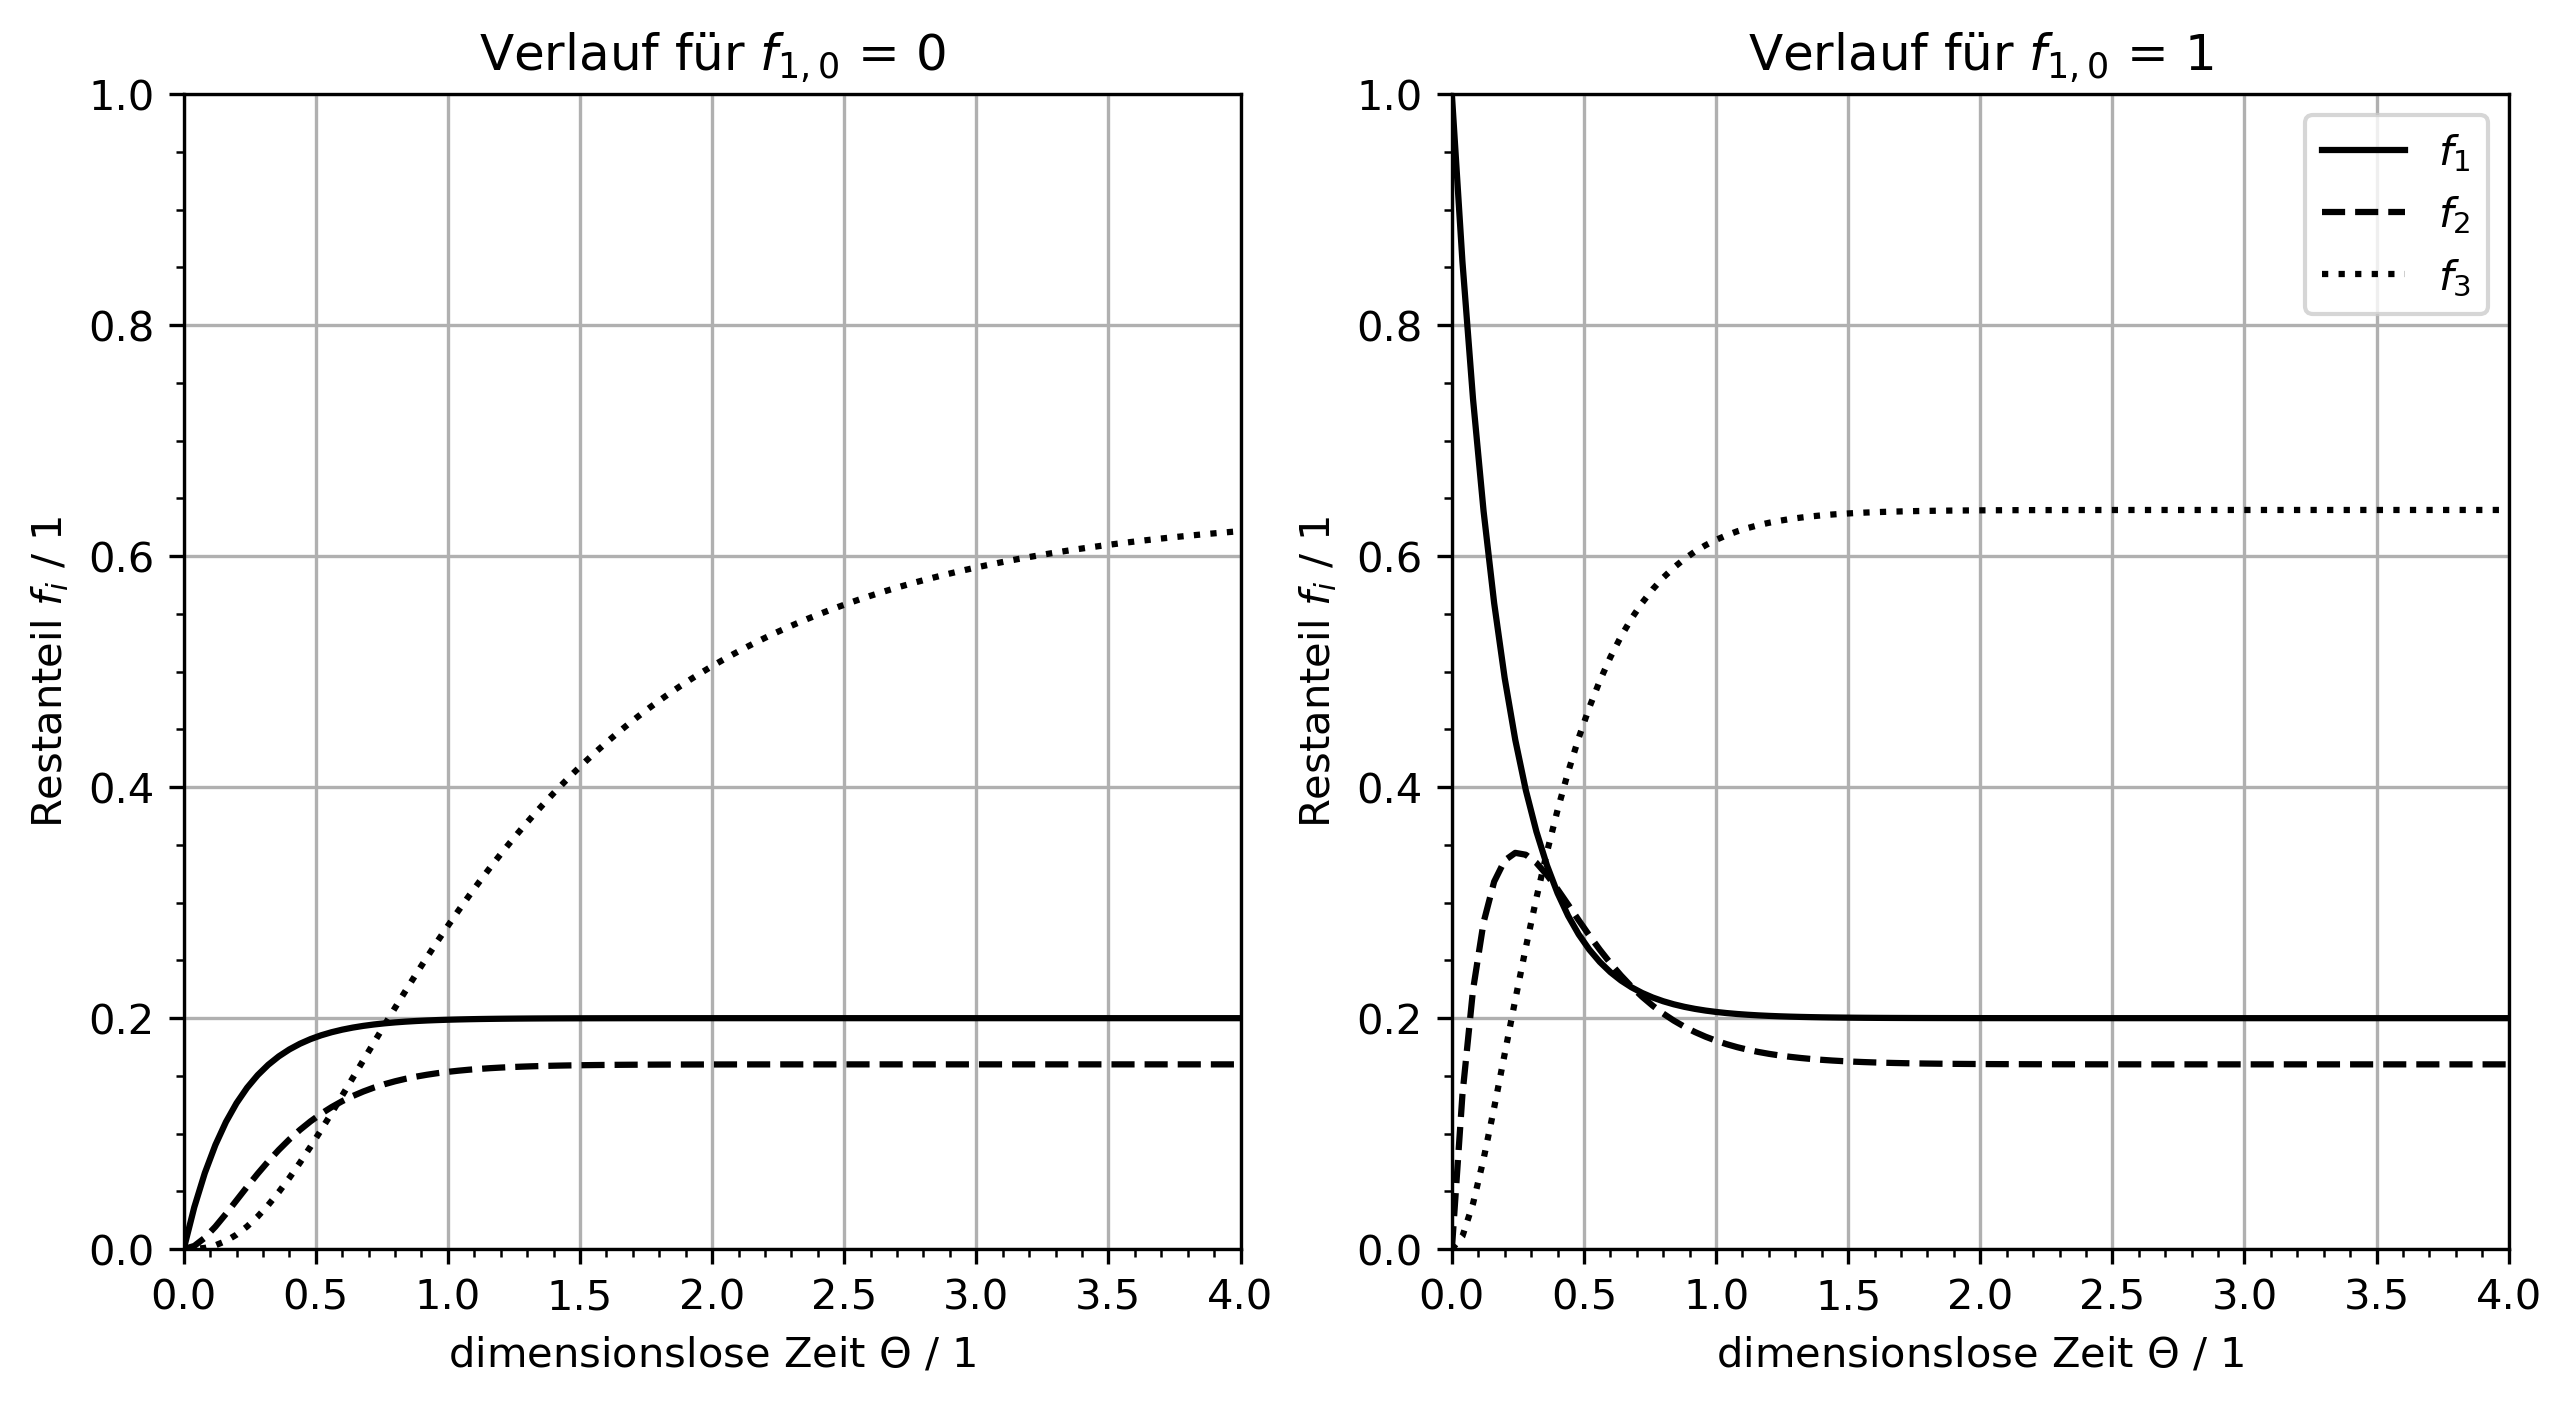

In [5]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10, 5), dpi = 300)

ax1.plot(t, save_0[0], label = 'f_1', color = 'black', linestyle = 'solid')
ax1.plot(t, save_0[1], label = 'f_2', color = 'black', linestyle = 'dashed')
ax1.plot(t, save_0[2], label = 'f_3', color = 'black', linestyle = 'dotted')

ax1.set_xlabel('dimensionslose Zeit $\Theta$ / 1')
ax1.set_ylabel('Restanteil $f_i$ / 1')
ax1.set_xlim(0,4)
ax1.set_ylim(0,1)

ax1.set_title('Verlauf für $f_{1,0}$ = 0')
ax1.minorticks_on()

ax1.grid(True)

ax2.plot(t, save_1[0], label = '$f_1$', color = 'black', linestyle = 'solid')
ax2.plot(t, save_1[1], label = '$f_2$', color = 'black', linestyle = 'dashed')
ax2.plot(t, save_1[2], label = '$f_3$', color = 'black', linestyle = 'dotted')

ax2.set_xlabel('dimensionslose Zeit $\Theta$ / 1')
ax2.set_ylabel('Restanteil $f_i$ / 1')
ax2.set_xlim(0,4)
ax2.set_ylim(0,1)

ax2.set_title('Verlauf für $f_{1,0}$ = 1')
ax2.minorticks_on()

ax2.legend(loc = 'best')
ax2.grid(True)

plt.show()